In [ ]:
#ensamble learning
through this process create strongle modle from multiple weak models
reduce variance and overfitting
increase accuracy

#2 types
1.bagging (multiple model independently training)
also call bootstrap aggragating
create subset from data (called random bootstrap)

2.boosting(model secquential built )
every next model decrease error of previous model and increases efficiency and performance

In [ ]:
#RANDOM FOREST
essemble of decision tree is called random forest
every node have random subset of features

used when data is tabular and you need better performance and accuracy
#2 types
1.bagging
2.boosting

can be used for calssification and regression

In [ ]:
#DEEP LEARNING
have 3 layers
1.input layer
2.middle layer
3.output layer
(have activation functions in hiddden layers) (eg: softmax , ReLU (Rectified Linear Unit))
having layers of interconnected neurons

Convolutional neural networks(CNN)(for images)
artifical neural networks 

Accuracy: 1.0


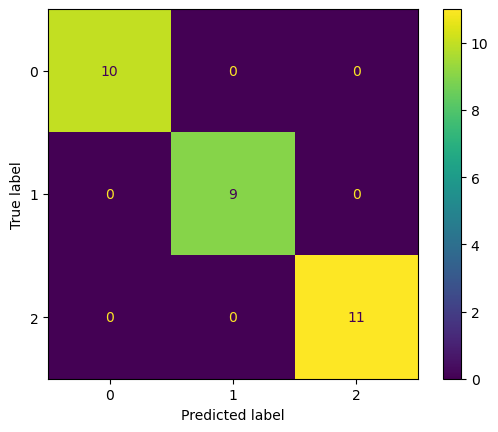

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Example: Load your data (replace with your actual dataset)
# df = pd.read_csv('your_data.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# For demonstration, let's use a sample dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [9]:
pip install scikit-learn pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor

# Load Iris dataset
iris = load_iris()
X = iris.data
y_class = iris.target
y_reg = iris.data[:, 2]  # Let's predict petal length for regression

# Split datasets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42, stratify=y_class)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)

# 1. Bagging with Decision Tree
dt = DecisionTreeClassifier()
bagging_dt = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=42, n_jobs=-1)
bagging_dt.fit(X_train_class, y_train_class)
y_pred_dt = bagging_dt.predict(X_test_class)

print("=== Bagging with Decision Tree ===")
print("Accuracy:", accuracy_score(y_test_class, y_pred_dt))
print(classification_report(y_test_class, y_pred_dt))

# 2. Bagging with KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=50, random_state=42, n_jobs=-1)
bagging_knn.fit(X_train_class, y_train_class)
y_pred_knn = bagging_knn.predict(X_test_class)

print("\n=== Bagging with KNN ===")
print("Accuracy:", accuracy_score(y_test_class, y_pred_knn))
print(classification_report(y_test_class, y_pred_knn))

# 3. Random Forest Regressor on petal length
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)

print("\n=== Random Forest Regressor (Petal Length) ===")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))

# Optional: Visualize feature importance for regression
importances = rf_reg.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(iris.feature_names, importances)
plt.title("Feature Importances - Random Forest Regressor")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [5]:
#bagging code for regression on irirs dataset

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :-1]  # Use first 3 features as predictors
y = iris.data[:, -1]   # Use last feature (petal width) as continuous target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Regressor with Decision Tree as base estimator
bagging_regressor = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_regressor.predict(X_test)

# Evaluate with Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Iris dataset (regression): {mse:.4f}")


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [7]:
#bagging code for classification on irirs datset
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier()

# Initialize BaggingClassifier with the base estimator
bagging_clf = BaggingClassifier(
    base_estimator=base_classifier,
    n_estimators=50,       # Number of trees
    random_state=42
)

# Train the Bagging classifier
bagging_clf.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy on Iris dataset: {accuracy:.4f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [11]:
# bostingcode for classification on irirs dataset
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoost classifier with 50 estimators and default base estimator (Decision Tree stump)
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy on Iris dataset: {accuracy:.4f}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Accuracy on Iris dataset: 1.0000


In [9]:
#bosting code for regressionon irirs dataset
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :3]   # Use first 3 features as predictors
y = iris.data[:, 3]    # Use 4th feature (petal width) as regression target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoost regressor with decision tree as base estimator
regressor = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train the regressor
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Evaluate with mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


TypeError: AdaBoostRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [13]:
#deep learning code

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
model.evaluate(X_test, y_test)


ModuleNotFoundError: No module named 'tensorflow'